## Question 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
print(users.groupby('occupation').age.min())
print(users.groupby('occupation').age.max())

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64
occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [5]:
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).count()
occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

## Question 2

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
euro12=pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv',sep=',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [9]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [10]:
teams=euro12['Team'].nunique()
print(f'{teams} teams participated in the Euro2012')

16 teams participated in the Euro2012


In [11]:
col=len(euro12.columns)
print(f'There are {col} columns in the Euro2012 dataset')

There are 35 columns in the Euro2012 dataset


In [12]:
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [13]:
discipline.sort_values(['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [14]:
euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [15]:
euro12[euro12['Goals']>6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

In [16]:
for i in euro12['Team']:
    if i.startswith('G'):
        print(i)

Germany
Greece


In [17]:
euro12.iloc[::,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [18]:
euro12.iloc[::,:-4]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,NaN,0,10,3,13,81.3%,41,62,2,9
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,2.0,1,10,6,9,60.1%,53,73,8,7
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,0.0,1,10,5,10,66.7%,25,38,8,4
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,1.0,2,29,3,22,88.1%,43,45,6,5
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,0.0,1,7,5,6,54.6%,36,51,5,6
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,0.0,1,11,6,10,62.6%,63,49,12,4
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,0.0,1,23,7,13,65.1%,67,48,12,9
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,1.0,2,18,7,20,74.1%,101,89,16,16
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0.0,0,9,5,12,70.6%,35,30,3,5
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0.0,0,8,3,6,66.7%,48,56,3,7


In [19]:
euro12[(euro12['Team']=='England') | (euro12['Team']=='Italy') | (euro12['Team']=='Russia')][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

In [20]:
s1=pd.Series(np.random.randint(1,5,100))
s2=pd.Series(np.random.randint(1,4,100))
s3=pd.Series(np.random.randint(10000,30001,100))

In [21]:
data = {"s1": s1,
        "s2": s2,
        "s3": s3}

In [22]:
df = pd.concat(data,axis = 1)

In [23]:
df

,s1,s2,s3
0,1,1,13748
1,4,2,20890
2,3,3,27397
3,1,2,15172
4,3,3,28992
...,...,...,...
95,4,3,29458
96,3,1,29909
97,1,2,13507
98,1,2,20872


In [24]:
df.rename(columns = {'s1':'bedrs','s2':'bathrs','s3':'price_sqr_meters'}, inplace = True)

In [25]:
df

,bedrs,bathrs,price_sqr_meters
0,1,1,13748
1,4,2,20890
2,3,3,27397
3,1,2,15172
4,3,3,28992
...,...,...,...
95,4,3,29458
96,3,1,29909
97,1,2,13507
98,1,2,20872


In [26]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))
bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,1
1,4
2,3
3,1
4,3
...,...
95,29458
96,29909
97,13507
98,20872


In [27]:
len(bigcolumn)

300

In [28]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,1
1,4
2,3
3,1
4,3
...,...
295,29458
296,29909
297,13507
298,20872


# Question 5

In [29]:
import numpy as np
import pandas as pd

In [30]:
chipo=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')

In [31]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [32]:
print(f"Number of observations in the dataset {len(chipo)}")

Number of observations in the dataset 4622


In [33]:
print(f"Number of columns in the dataset {len(chipo.columns)}")

Number of columns in the dataset 5


In [34]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [35]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [36]:
print("The most-ordered item is Chicken Bowl")

The most-ordered item is Chicken Bowl


In [37]:
print("Chicken Bowl was ordered 726 times")

Chicken Bowl was ordered 726 times


In [38]:
chipo['choice_description'].value_counts()

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

In [39]:
print("The most ordered item in the choice_description column is Diet Coke")

The most ordered item in the choice_description column is Diet Coke


In [40]:
print(f"The total ordered item {chipo['order_id'].nunique()}")

The total ordered item 1834


In [41]:
chipo['item_price']=chipo['item_price'].apply(lambda price:float(price.replace('$','')))

In [42]:
print(f"The revenue for the period in the dataset {sum(chipo['item_price'])}")

The revenue for the period in the dataset 34500.16000000046


In [43]:
print(f"The average revenue amount per order {sum(chipo['item_price'])/chipo['order_id'].nunique()}")

The average revenue amount per order 18.811428571428824


In [44]:
print(f"The different items are sold {chipo['item_name'].nunique()}")

The different items are sold 50


## Question 06

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv(r'us-marriages-divorces-1867-2014.csv')

In [47]:
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [48]:
data = df[(df['Year']>1867) & (df['Year']<2014)]

In [49]:
data.isnull().sum()

Year                  0
Marriages             4
Divorces              4
Population            0
Marriages_per_1000    4
Divorces_per_1000     4
dtype: int64

In [50]:
data['Marriages_per_1000'] = data['Marriages_per_1000'].fillna(np.mean(data['Marriages_per_1000']))
data['Marriages'] = data['Marriages'].fillna(np.mean(data['Marriages']))
data['Divorces_per_1000'] = data['Divorces_per_1000'].fillna(np.mean(data['Divorces_per_1000']))
data['Divorces'] = data['Divorces'].fillna(np.mean(data['Divorces']))

In [51]:
data.isnull().sum()

Year                  0
Marriages             0
Divorces              0
Population            0
Marriages_per_1000    0
Divorces_per_1000     0
dtype: int64

In [52]:
data['Marriages_per_capita'] = data['Marriages_per_1000'].apply(lambda x:x/1000)
data['Divorces_per_capita'] = data['Divorces_per_1000'].apply(lambda x:x/1000)

In [53]:
data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,Marriages_per_capita,Divorces_per_capita
1,1868,345000.0,10000.0,37885000,9.1,0.3,0.0091,0.0003
2,1869,348000.0,11000.0,38870000,9.0,0.3,0.0090,0.0003
3,1870,352000.0,11000.0,39905000,8.8,0.3,0.0088,0.0003
4,1871,359000.0,12000.0,41010000,8.8,0.3,0.0088,0.0003
5,1872,378000.0,12000.0,42066000,9.0,0.3,0.0090,0.0003
...,...,...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8,0.0073,0.0028
141,2008,2157000.0,844000.0,304543000,7.1,2.8,0.0071,0.0028
142,2009,2080000.0,840000.0,307240000,6.8,2.7,0.0068,0.0027
143,2010,2096000.0,872000.0,309776000,6.8,2.8,0.0068,0.0028


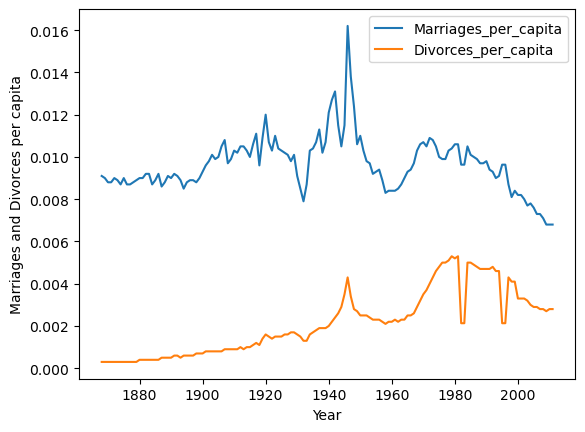

In [54]:
df_1 = pd.DataFrame({
   'Marriages_per_capita': list(data['Marriages_per_capita']),
   'Divorces_per_capita': list(data['Divorces_per_capita'])
   }, index=list(data['Year']))
lines = df_1.plot.line()
plt.xlabel('Year')
plt.ylabel('Marriages and Divorces per capita');

## Question 7

In [55]:
marr=pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [56]:
years = ['1900','1900-1950','1950-2014', '2014']
m = { '1900':0,'1900-1950':0,'1950-2014':0, '2014':0}
d = { '1900':0,'1900-1950':0,'1950-2014':0, '2014':0}

for i in range(0,len(marr)):
    for j in years:
        if (marr.iloc[i]['Year'] < 1900):
            m['1900'] = m['1900']+marr.iloc[i]['Marriages_per_1000']
            d['1900'] = d['1900']+marr.iloc[i]['Divorces_per_1000']
      
  
        elif (marr.iloc[i]['Year'] >= 1900  and   marr.iloc[i]['Year'] < 1950 ):
            m['1900-1950'] = m['1900-1950']+marr.iloc[i]['Marriages_per_1000']
            d['1900-1950'] = d['1900-1950']+marr.iloc[i]['Divorces_per_1000']

        elif (marr.iloc[i]['Year'] >= 1950  and   marr.iloc[i]['Year'] < 2014 ):
            m['1950-2014'] = m['1950-2014']+marr.iloc[i]['Marriages_per_1000']
            d['1950-2014'] = d['1950-2014']+marr.iloc[i]['Divorces_per_1000']
        elif(marr.iloc[i]['Year'] >2014):
            m['2014'] = m['2014']+marr.iloc[i]['Marriages_per_1000']
            d['2014'] = d['2014']+marr.iloc[i]['Divorces_per_1000']

In [57]:
m_value = list(m.values())
d_value = list(d.values())

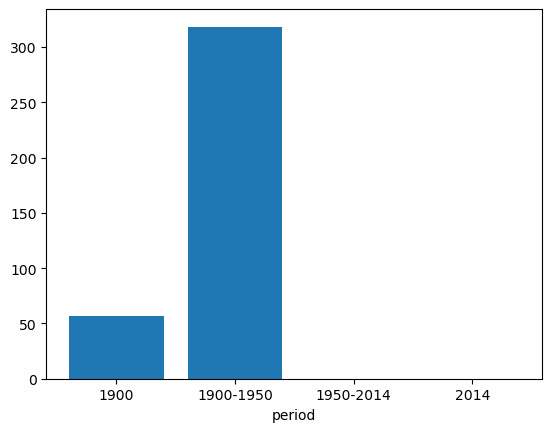

<function matplotlib.pyplot.show(close=None, block=None)>

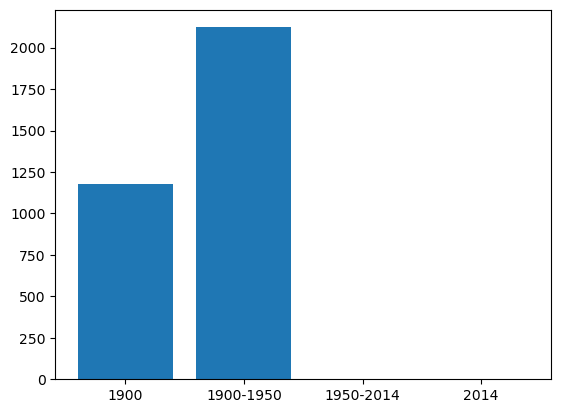

In [58]:
plt.bar(years,d_value)
plt.xlabel('period')

plt.show()
plt.bar(years,m_value)
plt.show

## Question 8

In [59]:
data = pd.read_csv(r'actor_kill_counts.csv')

In [60]:
data

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [61]:
d1 = data.sort_values('Count',ascending=False)

Text(0, 0.5, 'Killed_Counts')

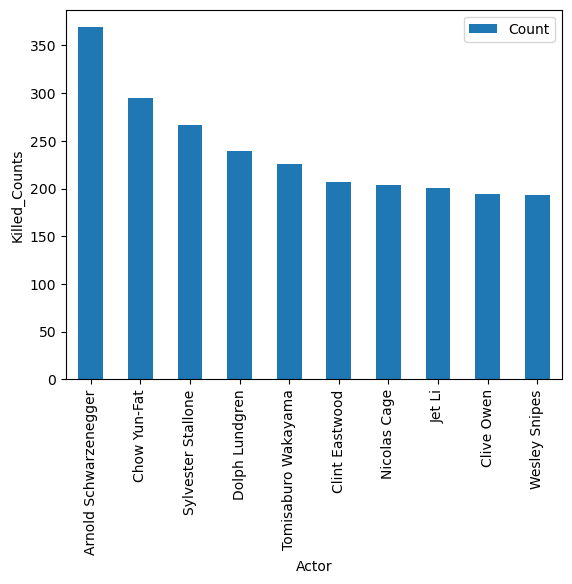

In [62]:
d1.plot.bar(x='Actor',y='Count')
plt.ylabel('Killed_Counts')

## Question9

In [63]:
roman = pd.read_csv(r'roman-emperor-reigns.csv')

In [64]:
roman

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [65]:
r1 = roman[roman['Cause_of_Death']=='Assassinated']

In [66]:
r1['percentage'] = roman['Length_of_Reign'].apply(lambda x:(x/sum(r1['Length_of_Reign']))*100)

In [67]:
r1


,Emperor,Length_of_Reign,Cause_of_Death,percentage
2,Caligula,4.83,Assassinated,3.519382
5,Galba,0.58,Assassinated,0.422617
7,Vitellius,0.67,Assassinated,0.488196
10,Domitian,15.00,Assassinated,10.929758
17,Commodus,15.00,Assassinated,10.929758
18,Pertinax,0.25,Assassinated,0.182163
21,Caracalla,19.00,Assassinated,13.844360
22,Geta,3.00,Assassinated,2.185952
24,Elagabalus,3.75,Assassinated,2.732440
25,Severus Alexander,13.00,Assassinated,9.472457


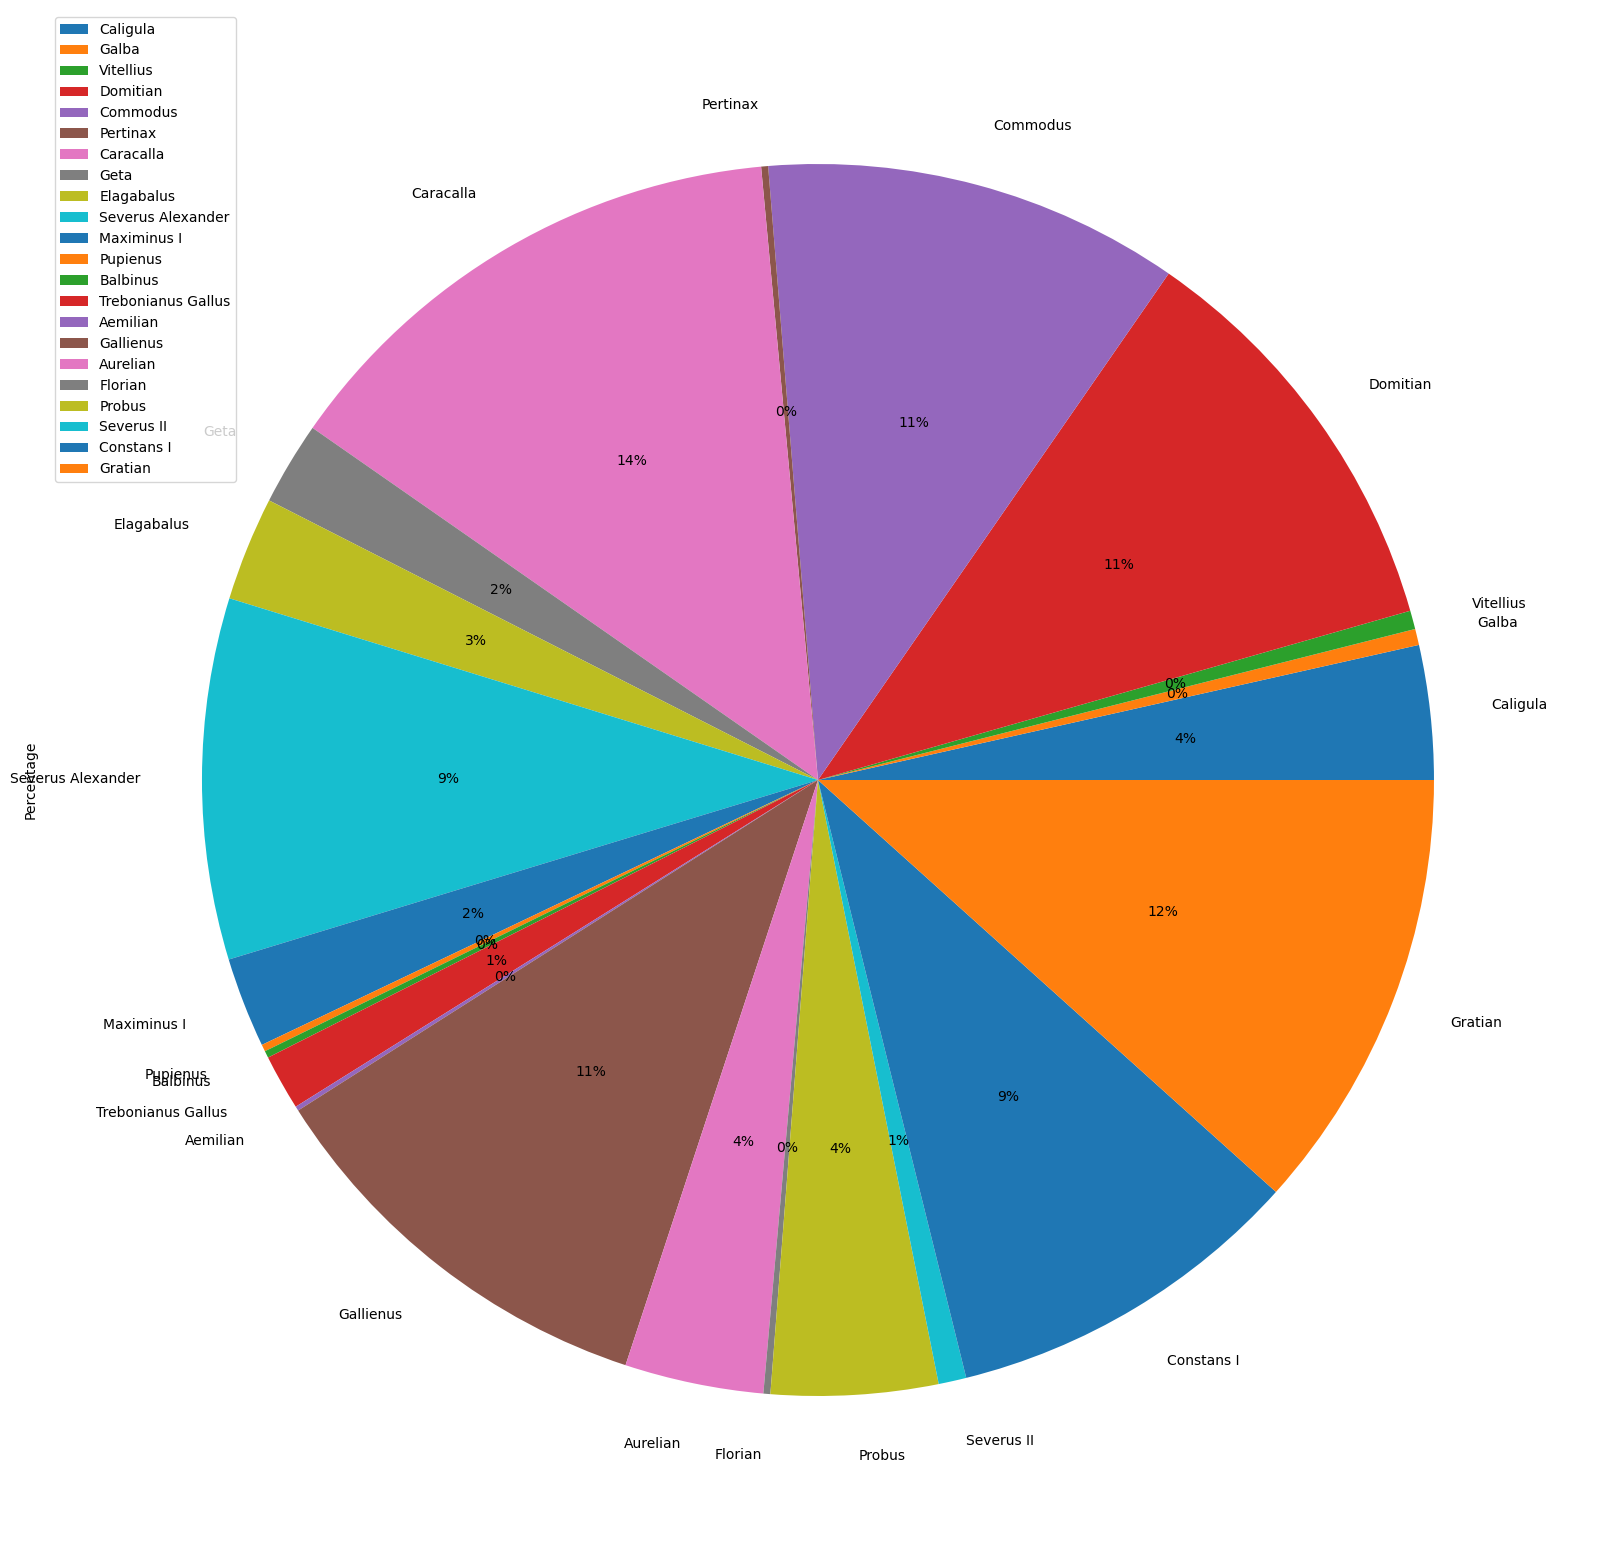

In [68]:
df = pd.DataFrame({'Percentage': list(r1['percentage'])},
                  index=list(r1['Emperor']))
plot = df.plot.pie(y='Percentage', figsize=(20, 20),autopct='%1.0f%%')

## Question 10

In [69]:
data = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')

In [70]:
data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [71]:
d1 = data[(data['Year']>2000) & (data['Year']<2009)]

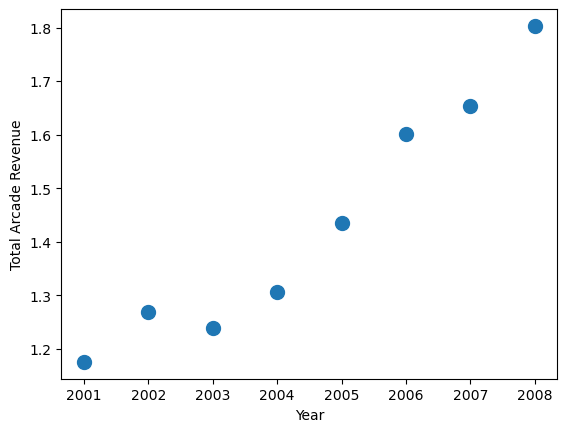

In [72]:
#Total Arcade Revenue
d2={'Year':list(d1['Year']),
      'Total Arcade Revenue':list(d1['Total Arcade Revenue (billions)'])
    }
  
# Load data into DataFrame
df = pd.DataFrame(data = d2);
  
# Draw a scatter plot
df.plot.scatter(x = 'Year', y ='Total Arcade Revenue', s = 100);

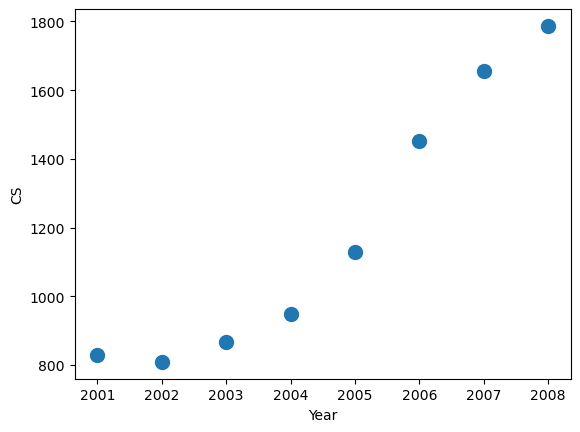

In [73]:
d3={'Year':list(d1['Year']),
      'CS':list(d1['Computer Science Doctorates Awarded (US)'])
    }
  
# Load data into DataFrame
df = pd.DataFrame(data = d3);
  
# Draw a scatter plot
df.plot.scatter(x = 'Year', y ='CS', s = 100);